In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stock_price = pd.read_csv(r'D:\Nishchal\Excelr Data Science\Project\Stock_Market_Analysis\Dataset\AAPL.csv')
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [2]:
stock_price.shape

(2011, 7)

In [3]:
stock_price.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:

stock_price_preprocessed = stock_price.drop_duplicates(subset=['Date'], keep='first')

stock_price_preprocessed.shape#There are noo duplicates or null values in the dataset

(2011, 7)

In [6]:
stock_price_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [7]:
#Type casting date column from Object to datetime
stock_price_preprocessed['Date'] = pd.to_datetime(stock_price_preprocessed['Date'], format="%Y-%m-%d") #changing the datatype of the date column from object to datetime
stock_price_preprocessed.info() #cross checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [22]:
stock_price_preprocessed.describe()

,Date,Open,High,Low,Close,Adj Close,Open_30MA,Open_60MA,High_30MA,High_60MA,Low_30MA,Low_60MA,Close_30MA,Close_60MA
count,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,1982.000000,1952.000000,1982.000000,1952.000000,1982.000000,1952.000000,1982.000000,1952.000000
mean,2016-01-01 03:10:28.344107520,126.707469,127.827594,125.580258,126.741235,119.505548,126.093410,125.495558,127.209732,126.609185,124.964203,124.366933,126.120020,125.515722
min,2012-01-03 00:00:00,55.424286,57.085712,55.014286,55.790001,48.921928,60.209143,61.401976,60.743048,62.146119,59.559714,60.667024,60.068000,61.372048
25%,2014-01-02 12:00:00,85.882858,86.717858,85.056427,86.202145,75.056679,85.874048,85.614316,86.703131,86.346613,84.841179,84.779393,85.788476,85.570572
50%,2015-12-31 00:00:00,113.050003,114.190002,111.870003,113.050003,105.222908,112.958167,113.285000,114.166333,114.344333,111.717167,112.066667,112.912333,113.303667
75%,2017-12-28 12:00:00,165.190002,167.409996,163.424995,165.245002,160.047111,164.820915,164.828875,166.450001,166.457251,163.349667,163.147500,165.031667,164.875875
max,2019-12-30 00:00:00,291.119995,293.970001,288.119995,291.519989,289.522614,271.477333,257.733165,273.531334,259.810667,269.766334,256.117168,272.175665,258.516999
std,NaN,50.483753,50.926301,50.124940,50.578369,52.438444,48.641733,47.011567,49.077907,47.448724,48.276781,46.647559,48.716831,47.077255


In [9]:
corelation = stock_price_preprocessed.corr(numeric_only=True)
corelation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


# Identifying Outliers

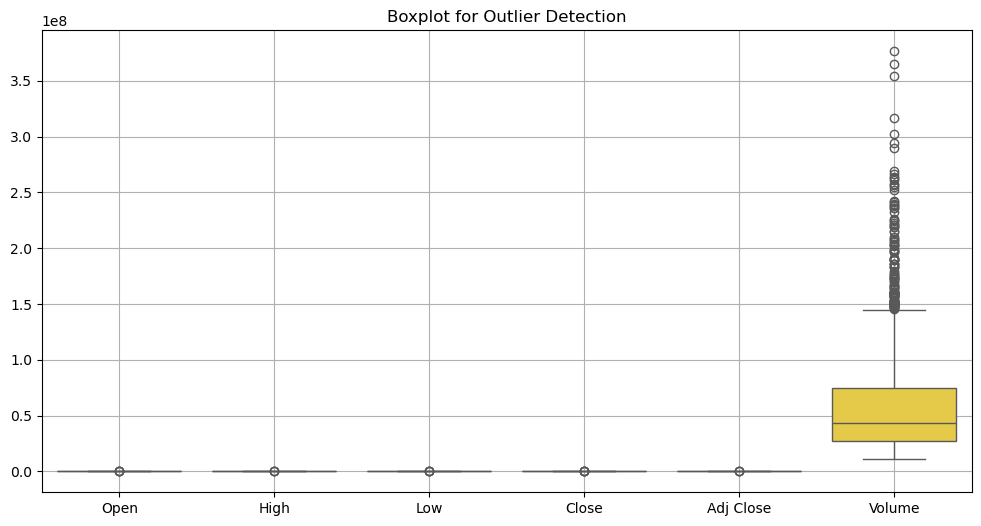

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=stock_price_preprocessed[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], palette='Set2')
plt.title('Boxplot for Outlier Detection')
plt.grid()
plt.show()
#The volume column has a lot of outliers. So the column is being dropped for model building

In [11]:
stock_price_preprocessed = stock_price_preprocessed.drop('Volume',axis=1)

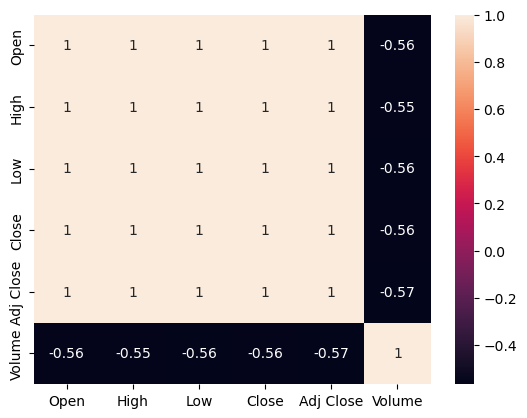

In [12]:
sns.heatmap(corelation,annot=True)
plt.show()

In [13]:
import warnings
warnings.filterwarnings("ignore")

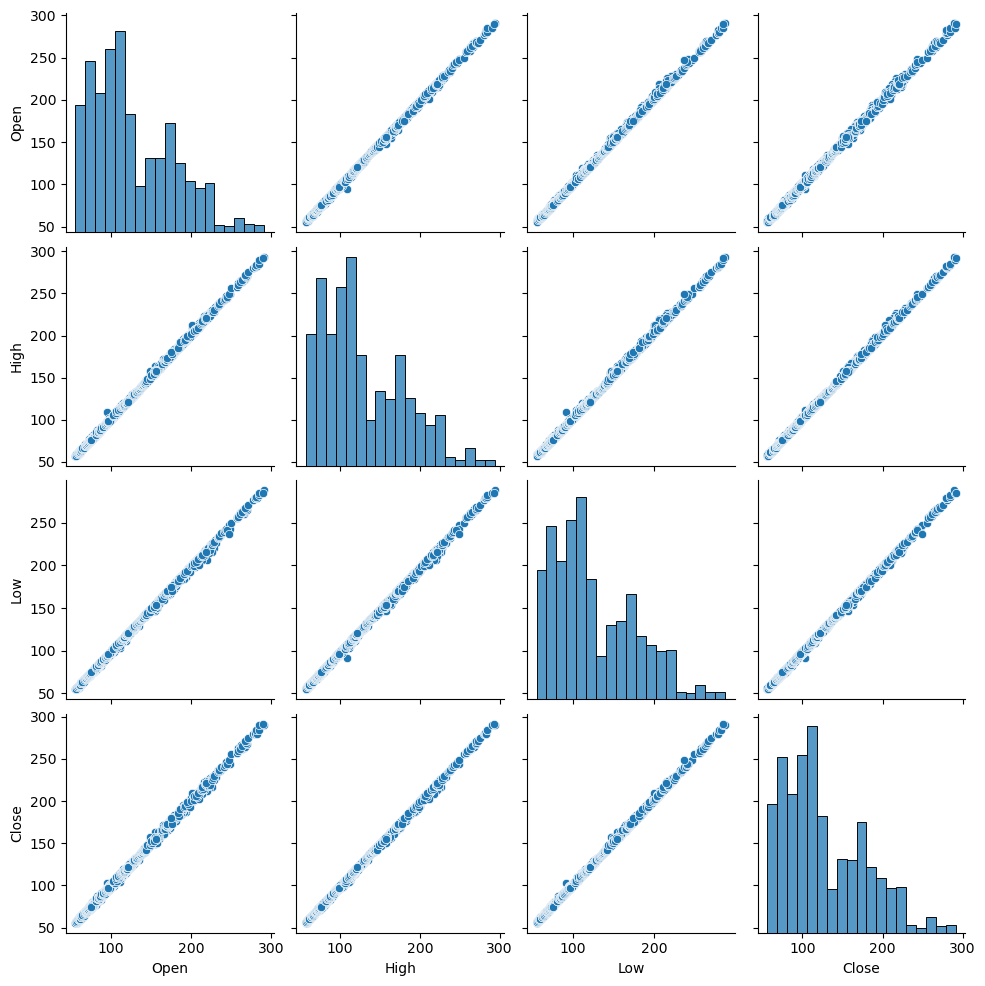

In [14]:
sns.pairplot(stock_price_preprocessed[['Open', 'High', 'Low', 'Close']])
plt.show()

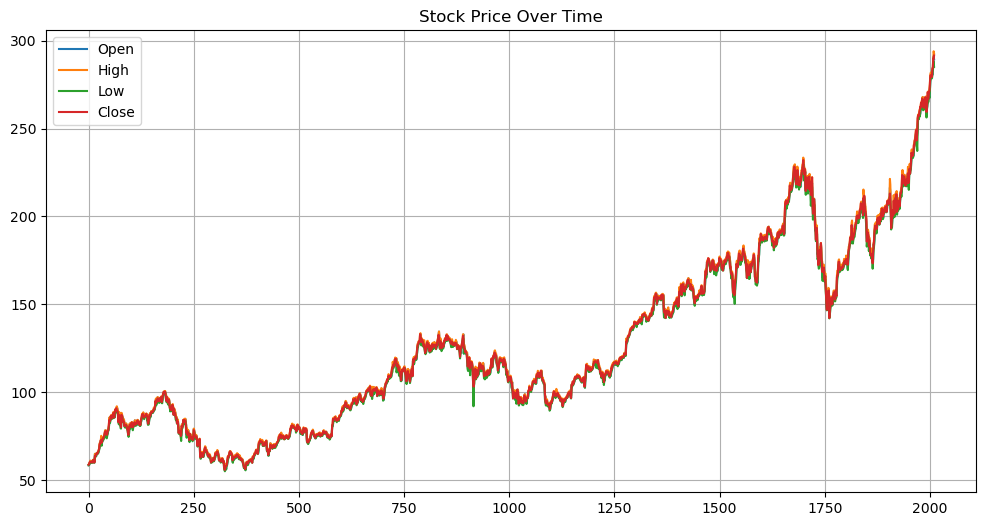

In [20]:
stock_price_preprocessed[['Open', 'High', 'Low', 'Close']].plot(figsize=(12,6), title="Stock Price Over Time")
plt.grid(True)
plt.show()

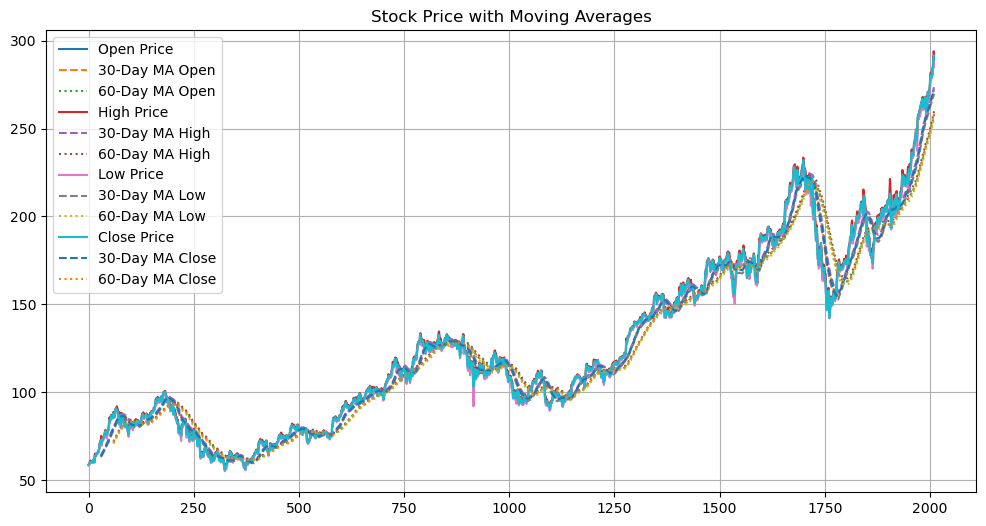

In [19]:
# Moving Averages for Open, High, Low, Close
for col in ['Open', 'High', 'Low', 'Close']:
    stock_price_preprocessed[f'{col}_30MA'] = stock_price_preprocessed[col].rolling(window=30).mean()
    stock_price_preprocessed[f'{col}_60MA'] = stock_price_preprocessed[col].rolling(window=60).mean()

plt.figure(figsize=(12,6))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(stock_price_preprocessed[col], label=f'{col} Price')
    plt.plot(stock_price_preprocessed[f'{col}_30MA'], label=f'30-Day MA {col}', linestyle='dashed')
    plt.plot(stock_price_preprocessed[f'{col}_60MA'], label=f'60-Day MA {col}', linestyle='dotted')
plt.legend()
plt.grid(True)
plt.title("Stock Price with Moving Averages")
plt.show()


In [18]:
stock_price_preprocessed.head(40)

,Date,Open,High,Low,Close,Adj Close,Open_30MA,Open_60MA,High_30MA,High_60MA,Low_30MA,Low_60MA,Close_30MA,Close_60MA
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012-01-17,60.599998,60.855713,60.422855,60.671429,52.428562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
print('Hello world')

Hello world
